In [1]:
'''
【课程2.10】  时间线图表、热图

tsplot() / heatmap()

'''

'\n【课程2.10】  时间线图表、热图\n\ntsplot() / heatmap()\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
sns.set_context("paper")
# 设置风格、尺度

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

(10, 31)
         0         1         2         3         4         5         6   \
0  1.740846  1.885462  2.431087  2.712477  2.761977  2.162644  1.669268   
1  0.447532  1.574404  1.681595  2.012875  1.384765  0.997983  0.636320   
2 -0.041343  0.084132  0.660423  1.585027  1.329875  0.954818  0.352434   
3  1.796042  2.384767  3.029794  2.479514  3.075381  1.975098  2.062563   
4 -0.528038  0.053989  0.761610  0.652709  0.882476 -0.075314 -0.566055   

         7         8         9   ...        21        22        23        24  \
0  1.218307  1.322109  0.763745  ...  0.340904  1.093367  0.484281  1.056098   
1  0.667195  0.024112  0.245663  ... -0.264679 -0.181007  0.256271  0.463543   
2 -0.212710 -0.212238 -0.567859  ... -0.585766 -0.657588 -0.721299 -0.369193   
3  1.885951  1.137537  1.118747  ...  1.085047  0.610108  1.296827  1.292401   
4 -0.328136 -1.323702 -1.575118  ... -1.135898 -1.832111 -0.791790 -1.438265   

         25        26        27        28        29        

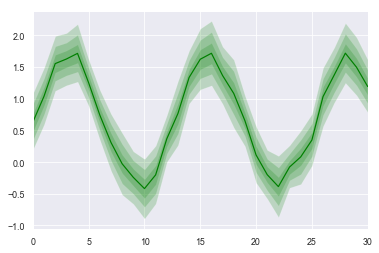

In [5]:
# 1、时间线图表 - tsplot()
# 简单示例

x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
print(data.shape)
print(pd.DataFrame(data).head())
# 创建数据

sns.tsplot(data=data,
           err_style="ci_band",   # 误差数据风格，可选：ci_band, ci_bars, boot_traces, boot_kde, unit_traces, unit_points
           interpolate=True,      # 是否连线
           ci = [40,70,90],       # 设置误差区间 
           color = 'g'            # 设置颜色
          )

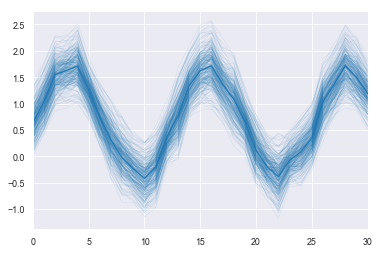

In [6]:
# 1、时间线图表 - tsplot()
# 简单示例

sns.tsplot(data=data, err_style="boot_traces", 
           n_boot=300   # 迭代次数
          )

   timepoint  ROI  subject  BOLD signal
0        0.0  IPS        0     0.513433
1        0.0  IPS        1    -0.414368
2        0.0  IPS        2     0.214695
3        0.0  IPS        3     0.814809
4        0.0  IPS        4    -0.894992
数据量为：6000条
timepoint为0.0时的数据量为：60条
timepoint共有100个唯一值


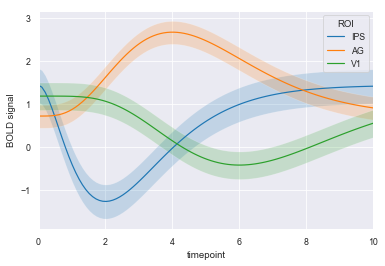

In [8]:
# 1、时间线图表 - tsplot()
# 参数设置

gammas = sns.load_dataset("gammas")
print(gammas.head())
print('数据量为：%i条' % len(gammas))
print('timepoint为0.0时的数据量为：%i条' % len(gammas[gammas['timepoint'] == 0]))
print('timepoint共有%i个唯一值' % len(gammas['timepoint'].value_counts()))
#print(gammas['timepoint'].value_counts())  # 查看唯一值具体信息
# 导入数据

sns.tsplot(time="timepoint",     # 时间数据，x轴
           value="BOLD signal",  # y轴value
           unit="subject",       # 拆分
           condition="ROI",      # 分类
           data=gammas)

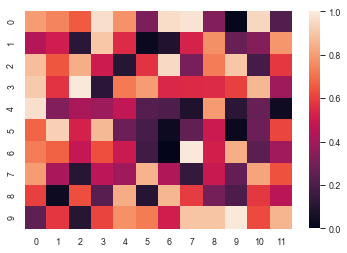

In [9]:
# 2、热图 - heatmap()
# 简单示例

df = pd.DataFrame(np.random.rand(10,12))
# 创建数据 - 10*12图表

sns.heatmap(df,    # 加载数据
            vmin=0, vmax=1   # 设置图例最大最小值
            )

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472  


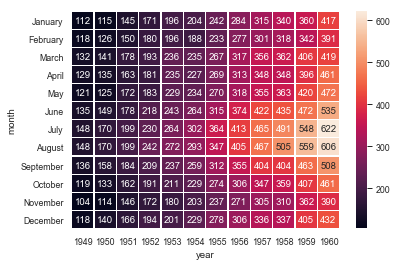

In [10]:
# 2、热图 - heatmap()
# 参数设置

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers") 
print(flights.head())
# 加载数据
           
sns.heatmap(flights,
            annot = True,      # 是否显示数值
            fmt = 'd',         # 格式化字符串
            linewidths = 0.2,  # 格子边线宽度
            #center = 100,      # 调色盘的色彩中心值，若没有指定，则以cmap为主
            #cmap = 'Reds',     # 设置调色盘
            cbar = True,       # 是否显示图例色带
            #cbar_kws={"orientation": "horizontal"},   # 是否横向显示图例色带
            #square = True,     # 是否正方形显示图表
           )

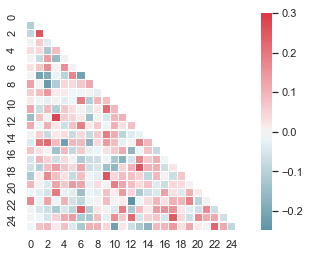

In [11]:
# 2、热图 - heatmap()
# 绘制半边热图

sns.set(style="white")
# 设置风格

rs = np.random.RandomState(33)
d = pd.DataFrame(rs.normal(size=(100, 26)))
corr = d.corr()   # 求解相关性矩阵表格
# 创建数据

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 设置一个“上三角形”蒙版

cmap = sns.diverging_palette(220, 10, as_cmap=True)
# 设置调色盘

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.2)
# 生成半边热图